# Import libraries

In [1]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,label,title,text,subject,date
0,1,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,1,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,1,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


# Data Preprocessing

In [4]:
# Drop unnecessary columns
data = data[['title', 'text', 'label']]
data.dropna(inplace=True)

In [5]:
# Text cleaning function
def preprocess_text(text):
    #Function to clean and preprocess text
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

In [6]:
# Features and target variable
X = data['title'] + " " + data['text']
y = data['label']

# Split the dataset into training and test sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training Data: {len(X_train)} samples")
print(f"Test Data: {len(X_test)} samples")

Training Data: 31953 samples
Test Data: 7989 samples


# Vectorization using TF-IDF

In [8]:
# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Model training

Logistic Regression

In [9]:
# Building the model using Logistic Regression
modelLR = LogisticRegression()
# Training the model on the training data
modelLR.fit(X_train_tfidf, y_train)

LogisticRegression()

Naive Bayes

In [10]:
# Building the model using Naive Bayes
modelNB = MultinomialNB()
# Training the model on the training data
modelNB.fit(X_train_tfidf, y_train)

MultinomialNB()

Random Forest

In [11]:
# Building the Random Forest 
modelRF = RandomForestClassifier()
# Training the model on the training data
modelRF.fit(X_train_tfidf, y_train)

RandomForestClassifier()

K-Nearest Neighbors (KNN)

In [12]:
# Building K-Nearest Neighbors (KNN)
modelKNN = KNeighborsClassifier()
# Training the model on the training data
modelKNN.fit(X_train_tfidf, y_train)

KNeighborsClassifier()

XGBoost

In [13]:
# Building XGBoost
modelXGB = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
# Training the model on the training data
modelXGB.fit(X_train_tfidf, y_train)

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [23:09:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

# Model evaluation (Predictions and Classification)

Logistic Regression

Accuracy Logistic Regression: 99.0362%
Classification Report Logistic Regression:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3996
           1       0.99      0.99      0.99      3993

    accuracy                           0.99      7989
   macro avg       0.99      0.99      0.99      7989
weighted avg       0.99      0.99      0.99      7989



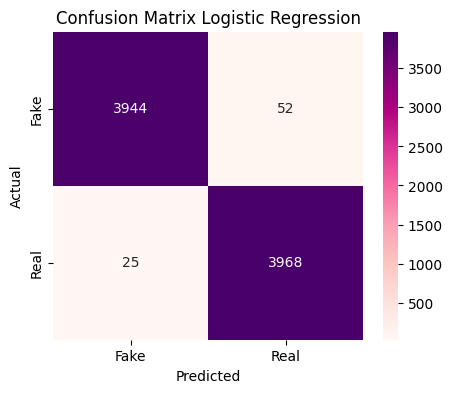

In [14]:
# Making predictions using Logistic Regression
y_predLR = modelLR.predict(X_test_tfidf)
# Calculating the accuracy 
accuracyLR = accuracy_score(y_test, y_predLR)
print(f"Accuracy Logistic Regression: {accuracyLR * 100:.4f}%")
# Printing the classification report (Precision, Recall, F1-Score)
print("Classification Report Logistic Regression:\n", classification_report(y_test, y_predLR))
# Printing the confusion matrix and Heatmap
cmLR = confusion_matrix(y_test, y_predLR)
plt.figure(figsize=(5,4))
sns.heatmap(cmLR, annot=True, fmt='d', cmap='RdPu', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Logistic Regression')
plt.show()

Naive Bayes

Accuracy Naive Bayes: 93.85%
Classification Report Naive Bayes:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      3996
           1       0.94      0.93      0.94      3993

    accuracy                           0.94      7989
   macro avg       0.94      0.94      0.94      7989
weighted avg       0.94      0.94      0.94      7989



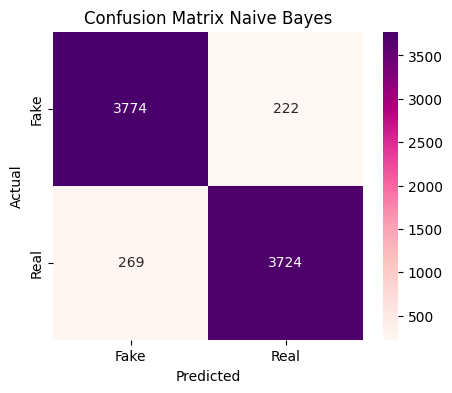

In [15]:
# Making predictions using Naive Bayes
y_predNB = modelNB.predict(X_test_tfidf)
# Calculating the accuracy
accuracyNB = accuracy_score(y_test, y_predNB)
print(f"Accuracy Naive Bayes: {accuracyNB * 100:.2f}%")
# Printing the classification report (Precision, Recall, F1-Score)
print("Classification Report Naive Bayes:\n", classification_report(y_test, y_predNB))
# Printing the confusion matrix and heatmap 
cmNB = confusion_matrix(y_test, y_predNB)
plt.figure(figsize=(5,4))
sns.heatmap(cmNB, annot=True, fmt='d', cmap='RdPu', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Naive Bayes')
plt.show()

Random Forest

Accuracy Random Forest: 99.72%
Classification Report Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3996
           1       1.00      1.00      1.00      3993

    accuracy                           1.00      7989
   macro avg       1.00      1.00      1.00      7989
weighted avg       1.00      1.00      1.00      7989



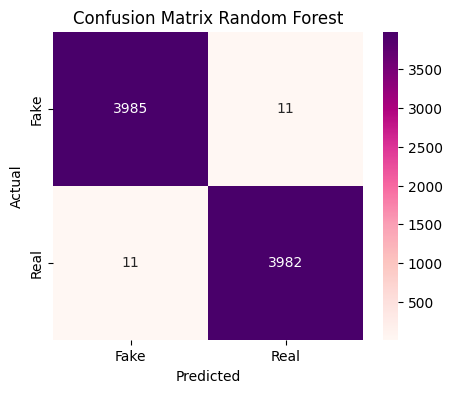

In [16]:
# Making predictions using Random Forest
y_predRF = modelRF.predict(X_test_tfidf)
# Calculating the accuracy
accuracyRF = accuracy_score(y_test, y_predRF)
print(f"Accuracy Random Forest: {accuracyRF * 100:.2f}%")
# Printing the classification report (Precision, Recall, F1-Score)
print("Classification Report Random Forest:\n", classification_report(y_test, y_predRF))
# Printing the confusion matrix and heatmap 
cmRF = confusion_matrix(y_test, y_predRF)
plt.figure(figsize=(5,4))
sns.heatmap(cmRF, annot=True, fmt='d', cmap='RdPu', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Random Forest')
plt.show()

K-Nearest Neighbors (KNN)

Accuracy K-Nearest Neighbors (KNN): 87.63%
Classification Report K-Nearest Neighbors (KNN):
               precision    recall  f1-score   support

           0       0.94      0.81      0.87      3996
           1       0.83      0.94      0.88      3993

    accuracy                           0.88      7989
   macro avg       0.88      0.88      0.88      7989
weighted avg       0.88      0.88      0.88      7989



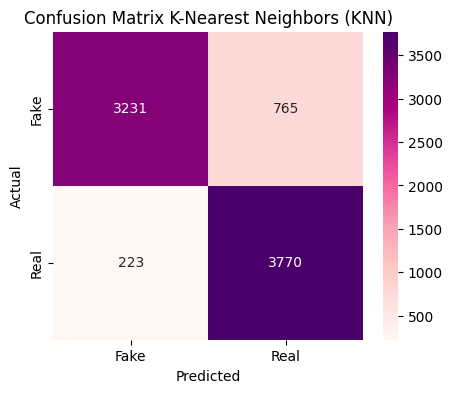

In [17]:
# Making predictions using K-Nearest Neighbors (KNN)
y_predKNN = modelKNN.predict(X_test_tfidf)
# Calculating the accuracy
accuracyKNN = accuracy_score(y_test, y_predKNN)
print(f"Accuracy K-Nearest Neighbors (KNN): {accuracyKNN * 100:.2f}%")
# Printing the classification report (Precision, Recall, F1-Score)
print("Classification Report K-Nearest Neighbors (KNN):\n", classification_report(y_test, y_predKNN))
# Printing the confusion matrix and heatmap 
cmKNN = confusion_matrix(y_test, y_predKNN)
plt.figure(figsize=(5,4))
sns.heatmap(cmKNN, annot=True, fmt='d', cmap='RdPu', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix K-Nearest Neighbors (KNN)')
plt.show()

XGBoost

Accuracy XGBoost: 99.71%
Classification Report XGBoost:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3996
           1       1.00      1.00      1.00      3993

    accuracy                           1.00      7989
   macro avg       1.00      1.00      1.00      7989
weighted avg       1.00      1.00      1.00      7989



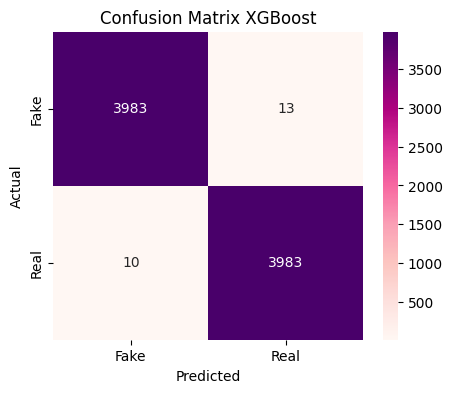

In [18]:
# Making predictions using XGBoost
y_predXGB = modelXGB.predict(X_test_tfidf)
# Calculating the accuracy
accuracyXGB = accuracy_score(y_test, y_predXGB)
print(f"Accuracy XGBoost: {accuracyXGB * 100:.2f}%")
# Printing the classification report (Precision, Recall, F1-Score)
print("Classification Report XGBoost:\n", classification_report(y_test, y_predXGB))
# Printing the confusion matrix and heatmap 
cmXGB = confusion_matrix(y_test, y_predXGB)
plt.figure(figsize=(5,4))
sns.heatmap(cmXGB, annot=True, fmt='d', cmap='RdPu', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix XGBoost')
plt.show()

# Compare between the models 

In [19]:
# Compare models and choose the best one based on accuracy
if accuracyLR > accuracyNB and accuracyLR > accuracyRF and accuracyLR > accuracyKNN and accuracyLR > accuracyXGB:
    best_model = "Logistic Regression"
elif accuracyNB > accuracyRF and accuracyNB > accuracyKNN and accuracyNB > accuracyXGB:
    best_model = "Naive Bayes"
elif accuracyRF > accuracyKNN and accuracyRF > accuracyXGB:
    best_model = "Random Forest"
elif accuracyKNN > accuracyXGB:
    best_model = "K-Nearest Neighbors (KNN)"
else:
    best_model = "XGBoost"
    
print(f"Best Model: {best_model}")

Best Model: Random Forest


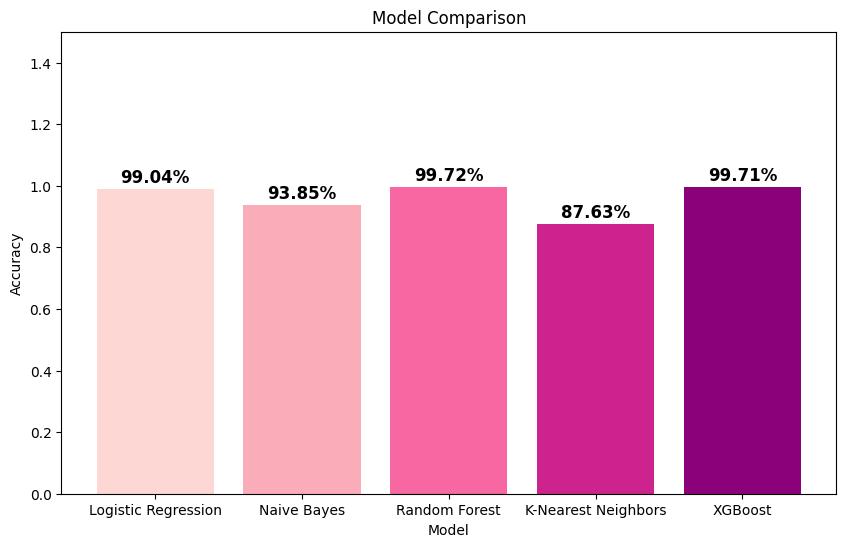

In [20]:
# Plot comparison of models' accuracy
plt.figure(figsize=(10, 6))
colors = sns.color_palette("RdPu", 5)

models = ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'K-Nearest Neighbors', 'XGBoost']
accuracies = [accuracyLR, accuracyNB, accuracyRF, accuracyKNN, accuracyXGB]

bars = plt.bar(models, accuracies, color=colors)

for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
             f"{accuracy * 100:.2f}%", ha='center', fontsize=12, fontweight='bold')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0, 1.5)

# Display the plot
plt.show()

# predictions on validation data

In [21]:
# Based on the previous logic, assign the actual model object to 'model'
if best_model == "Logistic Regression":
    model = modelLR
elif best_model == "Naive Bayes":
    model = modelNB
elif best_model == "Random Forest":
    model = modelRF
elif best_model == "K-Nearest Neighbors (KNN)":
    model = modelKNN
else:
    model = modelXGB  

print(model)

RandomForestClassifier()


In [22]:
# Read the validation data
validation_data = pd.read_csv('validation_data.csv')
# Combine title and text
X_validation = validation_data['title'] + " " + validation_data['text']
# Transform validation data with the same vectorizer used for training
X_validation_tfidf = vectorizer.transform(X_validation)

In [23]:
# Make predictions using the best model
predictions = model.predict(X_validation_tfidf)
# Add the predictions to the validation dataframe
validation_data['label'] = predictions

# Save the result to a new CSV file

In [24]:
# Save predictions to CSV
validation_data.to_csv('validation_predictions.csv', index=False)
print("Predictions saved to 'validation_predictions.csv'")
# Display the first few rows of the validation data with predictions
validation_data.head()

Predictions saved to 'validation_predictions.csv'


,label,title,text,subject,date
0,1,UK's May 'receiving regular updates' on London...,LONDON (Reuters) - British Prime Minister Ther...,worldnews,"September 15, 2017"
1,1,UK transport police leading investigation of L...,LONDON (Reuters) - British counter-terrorism p...,worldnews,"September 15, 2017"
2,1,Pacific nations crack down on North Korean shi...,WELLINGTON (Reuters) - South Pacific island na...,worldnews,"September 15, 2017"
3,1,Three suspected al Qaeda militants killed in Y...,"ADEN, Yemen (Reuters) - Three suspected al Qae...",worldnews,"September 15, 2017"
4,1,Chinese academics prod Beijing to consider Nor...,BEIJING (Reuters) - Chinese academics are publ...,worldnews,"September 15, 2017"


# Explain Predictions with LIME

In [25]:
pip install lime


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [26]:
import lime
from lime.lime_text import LimeTextExplainer

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCach

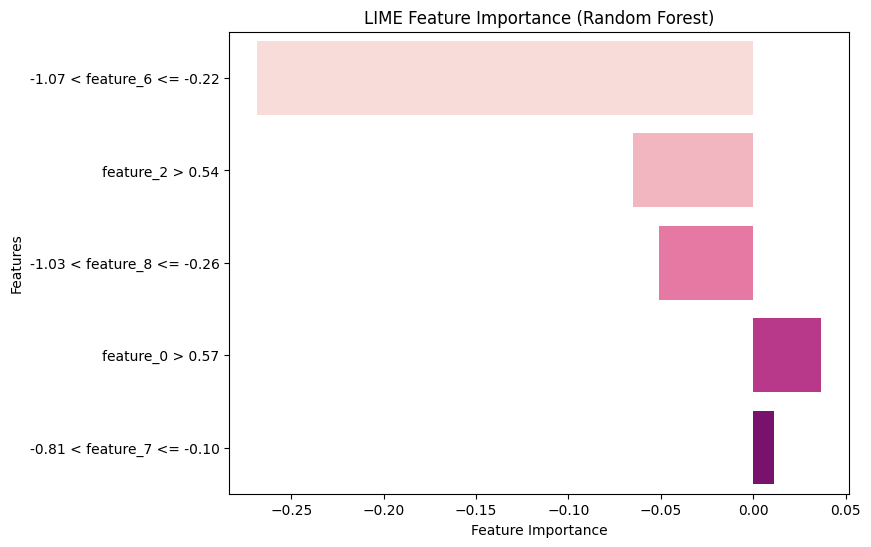

In [27]:
# Import required libraries
import lime
import lime.lime_tabular
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create dummy data as an example (you can replace this with your actual data)
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)
X = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(10)])
y = pd.Series(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
modelRF = RandomForestClassifier(random_state=42)
modelRF.fit(X_train, y_train)

# Create a LIME explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['Class 0', 'Class 1'],  # You can change these to ['Fake', 'Real'] if those are your labels
    mode='classification'
)

# Choose a sample from the test data to explain
sample_idx = 0  # You can change this index to select a different sample
sample = X_test.iloc[sample_idx]

# Explain the model's prediction on the chosen sample
exp = explainer.explain_instance(
    data_row=sample,
    predict_fn=modelRF.predict_proba,
    num_features=5  # Number of features you want to explain
)

# Extract feature importance and names from the explanation
feature_importances = exp.as_list()
features = [x[0] for x in feature_importances]
importances = [x[1] for x in feature_importances]

plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=features, palette="RdPu")

# Set plot labels and title
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('LIME Feature Importance (Random Forest)')

# Display the plot
plt.show()